PARTIE THÉORIQUE

Q1. Nous pouvons estimer l'espérance conditionnelle par la moyenne empirique de simulations conditionnelles grâce à la loi forte des grands nombres

Q2. On cherche à calculer la loi de Z sachant que 
$ (Z(x_{j_{1}}), ..., Z(x_{j_{n}})) = (z(x_{j_{1}}), ..., z(x_{j_{n}}))$ 
  
$Z$ est un vecteur gaussien, nous allons donc procéder comme dans le cours de probabilités IV. 
  
Nous posons donc à cet effet: 
  
$T = (Z(x_{j_{1}}), ..., Z(x_{j_{n}}))$ et $t = (z(x_{j_{1}}), ..., z(x_{j_{n}}))$ 
  
et nous cherchons à calculer la loi de $(Z\vert T = t)$
  
D'après le cours, on a tout de suite que la variable aléatoire $(Z\vert T = t)$ est gaussienne d'espérance:
$ m_{Z\vert T = t} = m_{Z} + C_{Z, T}C_{T}^{-1}(t-m_{t})$  

et de matrice de covariance:
$C S_{Z} = C_{Z} + C_{Z, T}C_{T}^{-1}C_{T, Z}$   
Avec $m_{Z} = (\mu, ..., \mu)$, $C_{Z, T} = Cov(Z, T)$, $C_{T} = Cov(T, T)$

 Q3. Y est un vecteur de composantes gaussiennes indépendantes, réduites (de variance 1) et centrées (d'espérance nulle) alors le vecteur Z = m + RY est gaussien comme combinaison linéaire de variable aléatoires gaussienne d'espérance m et de variance $ C=R R^t$ (matrice de covariance)

Q4. Supposons que l'on ait $Y = (Y_{1}, ..., Y_{n})$ un vecteur de composantes gaussiennes indépendantes toutes centrées réduites. D'après la question précédente, le vecteur $Z = m + RY$ est un gaussien d'espérance $m$ et de variance $C = RR^{t}$.
Nous allons donc utliser ce principe: on choisit $m = m_{Z\vert T=t}$ et on cherche $R$ tel que $RR^{t} = CS_{Z} $
On trouve cette matrice grâce à la décomposition de Cholesky de $CS_{Z} $

Enfin, on peut simuler un tel vecteur $Y$ grâce à la méthode de Box-Muller.

In [23]:
#Chargement de dépendances

import numpy as np
import matplotlib.pyplot as plt
import random as rd

#Discrétisation
A=0
B=500
N=101 #Nombre de points de discrétisation
Delta = (B-A)/(N-1)
discretization_indexes = np.arange(N)
discretization = discretization_indexes*Delta
#Paramètres du modèle

mu=-5
a = 50
sigma2 = 12

#Données

observation_indexes = [0,20,40,60,80,100]
depth = np.array([0,-4,-12.8,-1,-6.5,0])

#Indices des composantes correspondant aux observations et aux componsantes non observées

unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))

## Questions

In [3]:
#question 1
def C(h, a, sigma_2) :
    return sigma_2 * np.exp(-np.abs(h)/a)

In [4]:
#Question 2
# On construit la matrice D = (dij) où dij est la distance en abscisse entre les points i et j.

D = np.zeros((N,N))
for i in range(N):
    for j in range(i):
        D[i,j] = Delta * (i-j)
        D[j,i] = D[i,j]
        
print(D)

[[  0.   5.  10. ... 490. 495. 500.]
 [  5.   0.   5. ... 485. 490. 495.]
 [ 10.   5.   0. ... 480. 485. 490.]
 ...
 [490. 485. 480. ...   0.   5.  10.]
 [495. 490. 485. ...   5.   0.   5.]
 [500. 495. 490. ...  10.   5.   0.]]


In [5]:
#Question 3
C_Z = C(D, a, sigma2)
print(C_Z)

[[1.20000000e+01 1.08580490e+01 9.82476904e+00 ... 6.65419193e-04
  6.02096185e-04 5.44799157e-04]
 [1.08580490e+01 1.20000000e+01 1.08580490e+01 ... 7.35401941e-04
  6.65419193e-04 6.02096185e-04]
 [9.82476904e+00 1.08580490e+01 1.20000000e+01 ... 8.12744838e-04
  7.35401941e-04 6.65419193e-04]
 ...
 [6.65419193e-04 7.35401941e-04 8.12744838e-04 ... 1.20000000e+01
  1.08580490e+01 9.82476904e+00]
 [6.02096185e-04 6.65419193e-04 7.35401941e-04 ... 1.08580490e+01
  1.20000000e+01 1.08580490e+01]
 [5.44799157e-04 6.02096185e-04 6.65419193e-04 ... 9.82476904e+00
  1.08580490e+01 1.20000000e+01]]


4. Extraire les 3 matrices de covariance suivantes :

 * entre les observations

 * entre les observations et les inconnues

 * entre les inconnues

In [7]:
#Question 4

#on extrait la matrice de covariance entre les observations:
C_T = [[C_Z[i,j] for j in observation_indexes] for i in observation_indexes]
C_T = np.array(C_T)

#on extrait celles des inconnues
C_inc = [[C_Z[i,j] for j in unknown_indexes] for i in unknown_indexes]
C_inc = np.array(C_inc)

#on extrait celle des observations et des inconnues
C_T_Z = np.array([[ C_Z[i][j] for i in observation_indexes] for j in unknown_indexes])


Question 5   
D'après la question 2, $ m_{Z\vert T = t} = m_{Z} + C_{Z, T}C_{T}^{-1}(t-m_{t})$

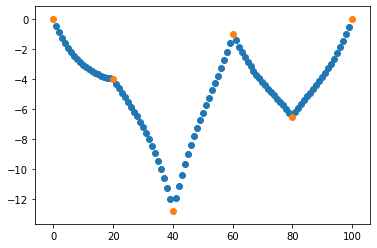

In [8]:
Inv_C_T = np.linalg.inv(C_T)

m_Z = [-5 for i in range (len(unknown_indexes))]
m_t = [-5 for i in range (len(observation_indexes))]

m_Z_t = m_Z + np.matmul(C_T_Z, np.matmul(Inv_C_T, (depth-m_t)))

plt.scatter(unknown_indexes, m_Z_t)
plt.scatter(observation_indexes, depth)
plt.show()

In [9]:
#Fonction qui complète un "résultat conditionnel" (comme l'espérance) de profondeurs
#à partir des données d'observations pour obtenir un vecteur à N coordonnées

def complete_profondeur(Liste):
    L=[]
    for j in Liste:
        L.append(j)
    for i in range(len(observation_indexes)):
        L.insert(observation_indexes[i],depth[i])
    return L

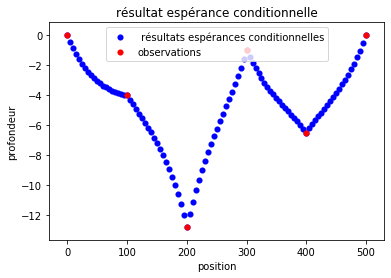

In [10]:
#représentation graphique

plt.xlabel("position")
plt.ylabel("profondeur")
plt.title("résultat espérance conditionnelle")
plt.scatter(discretization, complete_profondeur(m_Z_t), color='b', linewidth="0.1",
            label=' résultats espérances conditionnelles')
plt.scatter(np.asarray(observation_indexes)*5, depth, color='r', linewidth="0.1", label='observations')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

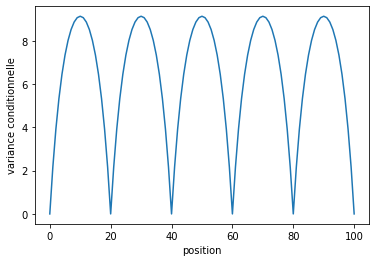

In [16]:
#question 6
#on calcule la matrice de covariance conditionnelle avec la formule du cours Proba IV. La fonction numpy matmul 
#permet de faire le produit matriciel de 2 arrays.

CS_Z = C_inc - np.matmul(np.matmul(C_T_Z,(Inv_C_T)),(C_T_Z.T))
Diag = [CS_Z[k][k] for k in range(95)]

#les points connus ont une variance conditionnelle nulle, il faut en tenir compte

var_condi = [(0 if i%20 == 0 else Diag[i - (i//20 + 1)]) for i in range (101)]
position = [k for k in range(101)]
             
plt.plot(position, var_condi)
plt.xlabel("position")
plt.ylabel("variance conditionnelle")
plt.show

On constate que plus la position est éloignée d'un point d'observation, et plus la variance conditionnelle augmente : cela s'explique par le fait que la profondeur est moins bien connue lorsque l'on s'éloigne des points d'observation.

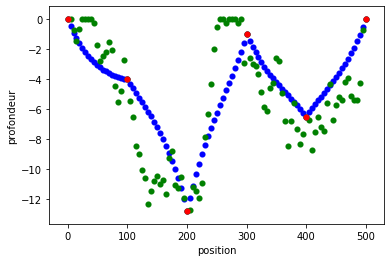

In [20]:
#question 7
#on se sert de la réponse à la question théorique 4

R = np.linalg.cholesky(CS_Z)

def simul() :
    Y1 = np.zeros(95)
    Y2 = np.zeros(95)
    for i in range(95) :
        U = np.random.uniform()
        V = np.random.uniform()
        Y1[i] = np.sqrt(-2*np.log(U))*np.cos(2*np.pi*V) #vecteur gaussien centré, réduit construit selon la méthode de Box-Muller
        Y2[i] = np.random.randn(1)
    Z = m_Z_t + R.dot(Y2)
    
    
    for k in range(len(Z)) :
        if Z[k]>0:
            Z[k] = 0
        
    return(Z)

Z = simul()
plt.xlabel("position")
plt.ylabel("profondeur")
plt.scatter(discretization, complete_profondeur(m_Z_t), color='b', linewidth="0.1",
            label=' résultats espérances conditionnelles')

plt.scatter(discretization, complete_profondeur(Z), color='g', linewidth="0.1",
            label=' résultats simulation conditionnelle')
plt.scatter(np.asarray(observation_indexes)*5, depth,color='r', linewidth="0.1", label='observations')


In [21]:
#question 8
#on applique le théorème de Pythagore

def longueur_cable(Profond, pas):
    L = []
    for k in range(len(Profond)-1):
        L.append(np.sqrt(pas**2 + (Profond[k+1]-Profond[k])**2))
    return(L)

In [30]:
#question 9

def simulation(n):
    Results = []
    for k in range(n):
        X = []
        Z = []
        for i in range(N-len(observation_indexes)):
            X.append(np.sqrt(-2*np.log(rd.random()))*np.cos(2*np.pi*rd.random()))
        Z = m_Z_t + np.dot(R, X)
        Results.append(Z)
    return(Results)

#On réalise 100 simulations:

Simulation_100 = simulation(100)

#On calcule la moyenne des longeurs de câble pour 100 simulations:

Moy = 0
for i in Simulation_100:
    L = longueur_cable(complete_profondeur(i), 5)
    Moy += L[i]
Moy = Moy/100


print(f'Pour 100 simulations, la moyenne des longueurs est {Moy}')
print(f"La longueur de l'espérance conditionnelle est alors {longueur_cable(complete_profondeur(m_Z_t), 5)}")

TypeError: only integer scalar arrays can be converted to a scalar index

In [26]:
#question 10 

Mn = []
N_values=[]
longueur_tot = 0
moy_longueur = 0
for i in range(len(Simulation_100)):
    N_values.append(i+1)
    longueur_tot += longueur_cable(complete_profondeur(Simulation_100[i]), 5)
    moy_longueur = longueur_tot/(i+1)
    Mn.append(moy_longueur)
    

plt.scatter(N_values,Mn)
plt.xlabel("Valeurs de n")
plt.ylabel('Longueur moyenne de câble')
plt.show()
    

TypeError: unsupported operand type(s) for +=: 'int' and 'list'

In [ ]:
#question 11

Long_cables = []
for i in Simulation_100:
    Long_cables.append(longueur_cable(complete_profondeur(i), 5))
        
plt.hist(Long_cables, range = (515, 530), bins = 10, color = 'blue',
            edgecolor = 'black')
plt.xlabel('longueur de câble')
plt.ylabel('nombre de câbles')
plt.show()

In [ ]:
# question 12


S1, S2 = 0, 0

for i in Mn : 
    S1 += i
moy = S1/100

for i in Mn :
    S2 += (i-moy)**2
    
ecart_type = np.sqrt(S2/100)

print(Mn)
print(ecart_type)

écart = 0.95*1/2*ecart_type/(np.sqrt(100))

print(f"l'intervalle de confiance a 95% vaut alors: [{moy-écart} ; {moy+écart}]") 

In [27]:
#question 13
#on va réaliser un grand nombre de simulation grâce à l'algorithme de la question 9, puis on évalut la probabilité
#que la longueur du câble dépasse 525m par (nombre de cas favorables)/(nombre de simulations)


Simulation_40000 = simulation(40000)
Cas_favorables = 0

for i in Simulation_40000:
    if longueur_cable(complete_profondeur(i),5) > 525: #question 5
        Cas_favorables += 1
    
print(f'la probabilité que la longueur de câble soit supérieure à 525m vaut {Nbre_cas_fav/50000:.2f}')

TypeError: '>' not supported between instances of 'list' and 'int'

In [ ]:
#question 14

L_1000 = simulation(1000)
L_10000 = simulation(10000)
L_20000 = simulation(100000)
L = [L_1000, L_10000, L_100000]

fig, axes = plt.subplots(2, 3, figsize = (15, 10))
for i in range(3) :
    affichage_Mn(L[i][0], axes[0, i]) #question 10
    histogramme(L[i][0], axes[1, i]) #question 11